We will first import the necessary packages. These will be

1.   Tensorflow
2.   PyPlot

order not withstanding. The first package actually contains the functions and objects used for our Neural Network while the second package is useful for displaying an example of our data.

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Import the dataset from the `tf.keras.datasets.mnist` object, note that we can just type `keras.datasets.mnist` because we previously imported keras directly from tensorflow, which means in our environment it is a standalone package; simultaneously being made available alongside the `tf.keras` version. Importing essentially the same specific thing like this might seem redundant but it is useful for shorthands and thus writing **readable code**.


In [79]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = tf.expand_dims(x_train, axis=-1), tf.expand_dims(x_test, axis=-1)

We use the `PyPlot` library we imported from `Matplotlib` to show a small sample of images from our data and write the corresponding digit below to know exactly what we are working with.

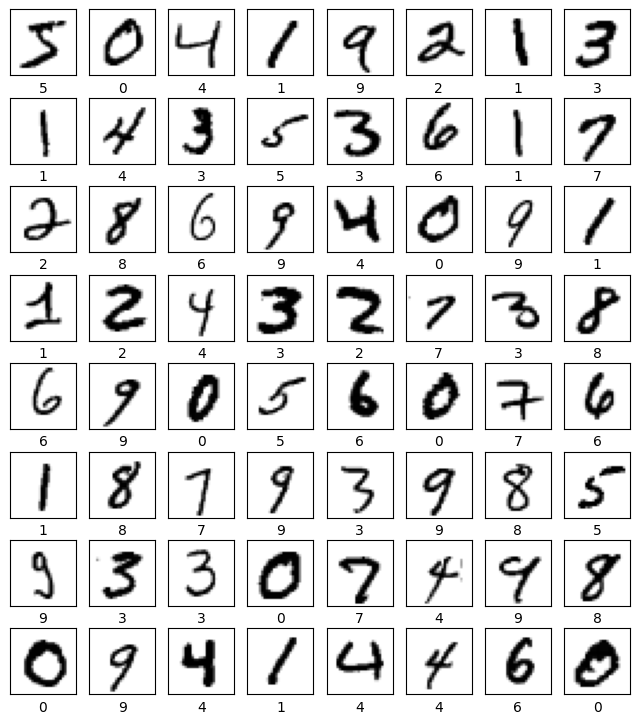

In [78]:
def show():
    figure_length = 8
    plt.figure(figsize=(figure_length, figure_length+1))
    for i in range(figure_length**2):
        plt.subplot(figure_length, figure_length, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(y_train[i])
show()

`tensorflow.keras` is used to initialize a variable which will hold all of our model parameters and act as an interface to run and train our model with. Google as you wish, this is the good part of `tensorflow`, it allows the rapid creations of different models and easy prototyping.

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(6, (5, 5), input_shape=(28, 28, 1), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_19 (Aver  (None, 12, 12, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_20 (Aver  (None, 4, 4, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)             

Here we create three variables for our loss function, optimization algorithm and the parameter to optimize for then insert it into our `model` variable with `model.compile()`.

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]
model.compile(optimizer=optim, loss=loss, metrics=metrics)

These are some basic hyperparameters for the training stage.


*   `batch_size` It is the number of images we will pass through the network at a time until we have consumed the entire training set in a single epoch. This allows us to utilize the GPU-acceleration and multi-threading.
*   `epochs` The number of times we will loop over the entire training set during training.



In [ ]:
batch_size=64
epochs = 5

In [72]:
model.fit(x_train, y_train, epochs=epochs,
          batch_size=batch_size, verbose=2)

model.evaluate(x_test,  y_test, batch_size=batch_size, verbose=2)

Epoch 1/5
938/938 - 24s - loss: 0.0321 - accuracy: 0.9901 - 24s/epoch - 26ms/step
Epoch 2/5
938/938 - 23s - loss: 0.0272 - accuracy: 0.9911 - 23s/epoch - 25ms/step
Epoch 3/5
938/938 - 23s - loss: 0.0227 - accuracy: 0.9928 - 23s/epoch - 25ms/step
Epoch 4/5
938/938 - 23s - loss: 0.0200 - accuracy: 0.9939 - 23s/epoch - 25ms/step
Epoch 5/5
938/938 - 22s - loss: 0.0161 - accuracy: 0.9948 - 22s/epoch - 24ms/step
157/157 - 3s - loss: 0.0363 - accuracy: 0.9885 - 3s/epoch - 19ms/step


[0.03632612153887749, 0.9884999990463257]

`model.fit()` function automatically does back-propogation to optimize for the accuracy we set earlier, according to the input-output values we give it. In this case, we have a total of **60.000 images** that the program will loop over **5 times**. `model.evaluate()` on the other hand allows us to test the accuracy of our model against any dataset.

Here, we notice that our model performs with an accuracy of 99.48% for our training set, while performing with an accuracy of 98.85% for our test set. We have avoided overfitting, which is what makes the **LeNet5** model valuable. **High performance**, for a **meager amount of parameters**.